In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 # set the fonttype of all pdf to 42
plt.rcParams['ps.fonttype'] = 42   # set the PostScript plots 

# show figures in the notebook
%matplotlib inline 

sc.settings.set_figure_params(dpi=200) # save umaps as non-vectorial hi-res images
# plt.rcParams['figure.figsize']=(10,10) # make figures square if not using the setting bellow
sc.set_figure_params(frameon=False)

In [2]:
adata = sc.read_h5ad("data/TabulaSapiens.h5ad")
adata

AnnData object with n_obs × n_vars = 483152 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'compartment_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [4]:
# loc. specific col. in .obs
adata.obs[['organ_tissue', 'cell_ontology_class']]

,organ_tissue,cell_ontology_class
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,macrophage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,monocyte
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,endothelial cell of hepatic sinusoid
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,macrophage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,liver dendritic cell
...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,endothelial cell
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,endothelial cell


In [4]:
# first five rows 
adata.obs.head()

,organ_tissue,method,donor,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,gender
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,male
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,male
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,7787.0,2983,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,male
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,male
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,10X,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,male


/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


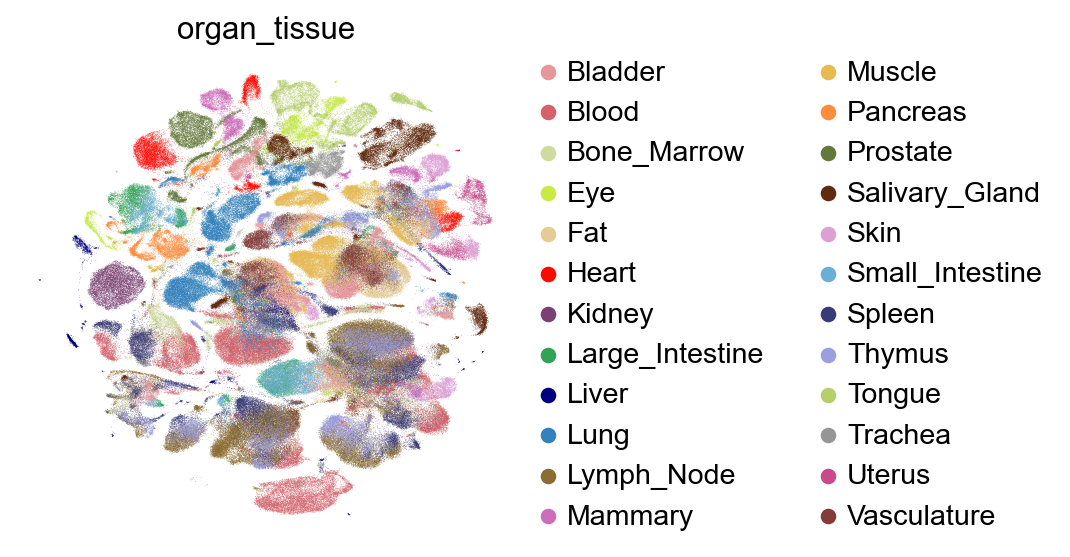

In [5]:
sc.pl.umap(adata, color=['organ_tissue'])

In [6]:
set(adata.obs['compartment'])

{'endothelial', 'epithelial', 'germ line', 'immune', 'stromal'}

In [7]:
# loop thru the compartment
for c in set(adata.obs["compartment"]):
    print(c)

endothelial
germ line
epithelial
stromal
immune


---
## endothelial

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


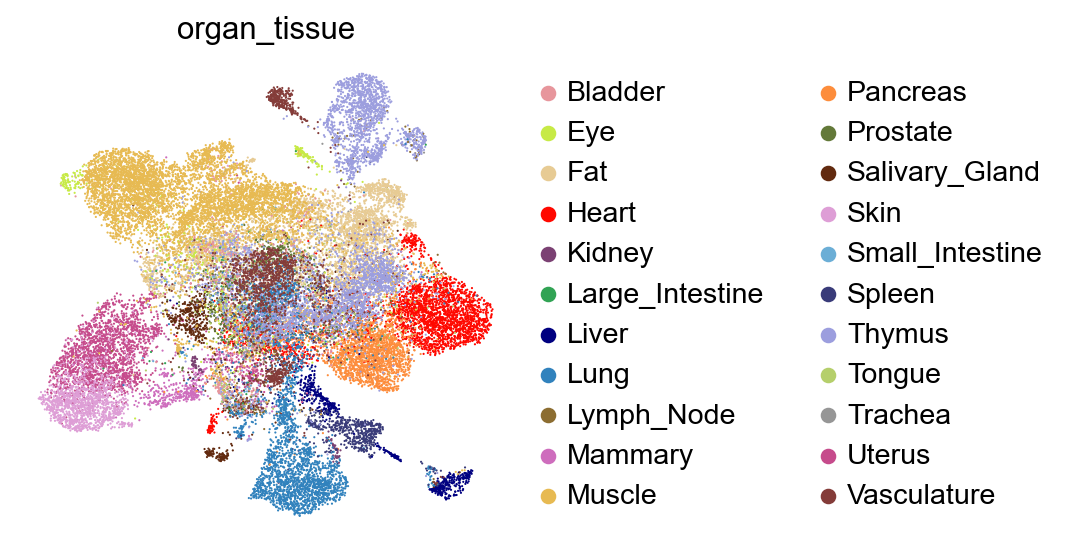

In [10]:
c = adata[adata.obs["compartment"]=='endothelial']
sc.pp.neighbors(c, use_rep="X_scvi")
sc.tl.umap(c)
sc.pl.umap(c, color='organ_tissue')

- endothelial w/ frameon

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


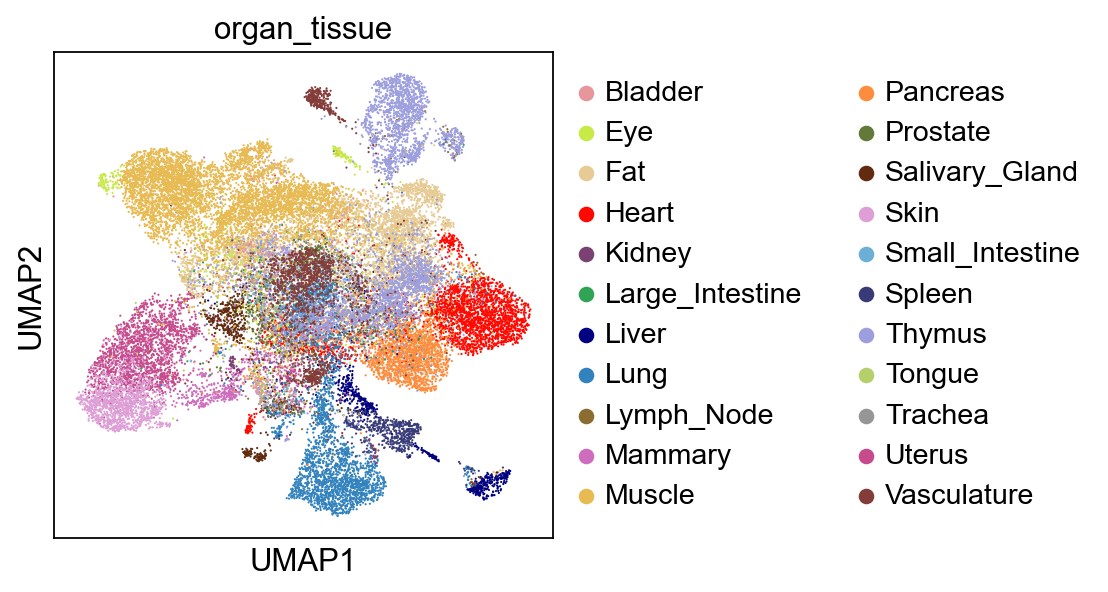

In [3]:
c = adata[adata.obs["compartment"]=='endothelial']
sc.pp.neighbors(c, use_rep="X_scvi")
sc.tl.umap(c)
sc.pl.umap(c, 
           color='organ_tissue',
           frameon=True)

- save w/ c?

In [3]:
c = adata[adata.obs["compartment"]=='endothelial']
sc.pp.neighbors(c, use_rep="X_scvi")
sc.tl.umap(c)
sc.pl.umap(c, 
           color='organ_tissue',
           frameon=True, 
           save='_upload_'+c+'.png' )

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: can only concatenate str (not "AnnData") to str

- saving w/o c

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


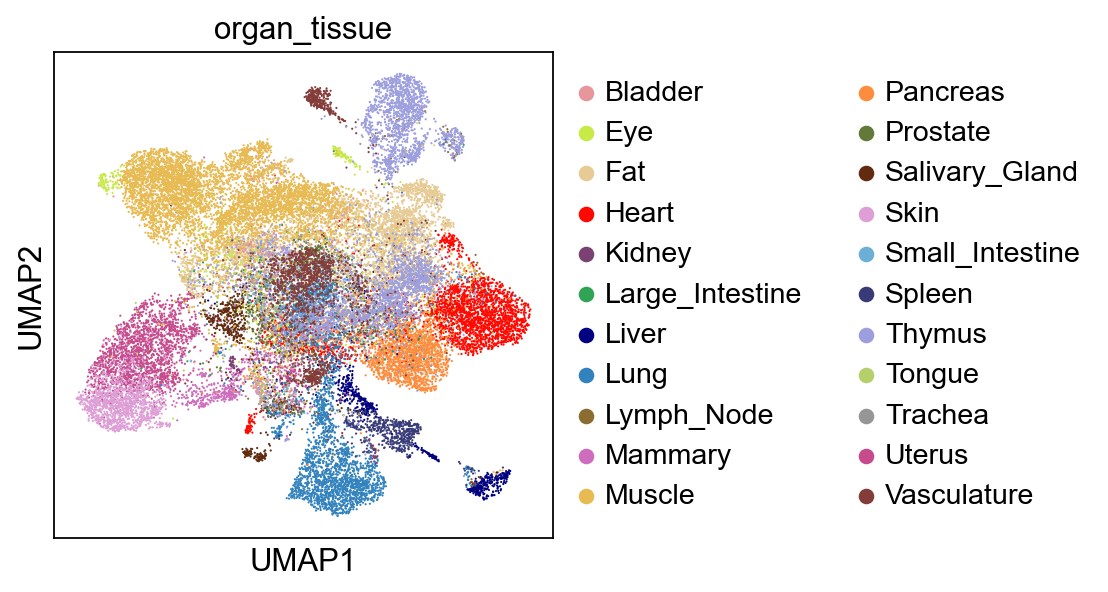

: 

In [4]:
c = adata[adata.obs["compartment"]=='endothelial']
sc.pp.neighbors(c, use_rep="X_scvi")
sc.tl.umap(c)
sc.pl.umap(c, 
           color='organ_tissue',
           frameon=True, 
           save='_upload_endothelial.png' )

- make a new .h5ad? 

In [4]:
c = adata[adata.obs["compartment"]=='endothelial']
c1 = adata[adata.obs["compartment"]==c].copy()
sc.pp.neighbors(c1, use_rep="X_scvi")
sc.tl.umap(c1)
sc.pl.umap(c1, 
           color='organ_tissue',
           frameon=True, 
           save='_upload_endothelial.png' )
c1.write('endothelial.h5ad')

: 

: 

---
germ line

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


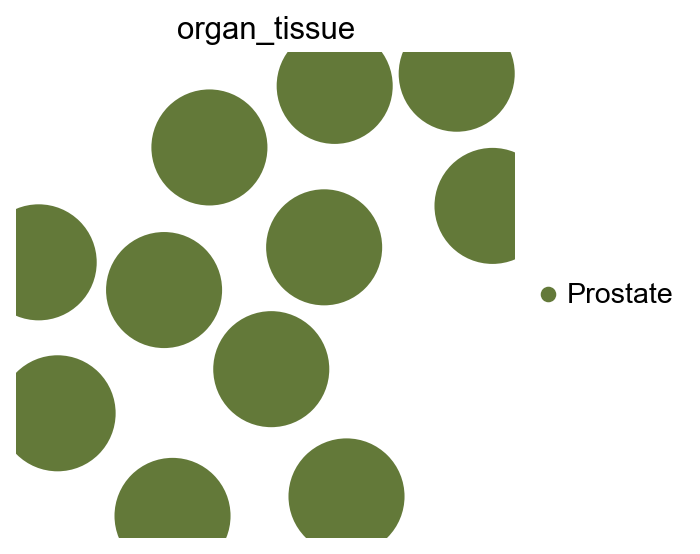

In [5]:
c = adata[adata.obs["compartment"]=='germ line']
sc.pp.neighbors(c, use_rep="X_scvi")
sc.tl.umap(c)
sc.pl.umap(c, color='organ_tissue')

---
immune

In [ ]:
c = adata[adata.obs["compartment"]=='immune']
sc.pp.neighbors(c, use_rep="X_scvi")
sc.tl.umap(c)
sc.pl.umap(c, color='organ_tissue')

---
stromal

/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/yinglin/opt/anaconda3/envs/sc1/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


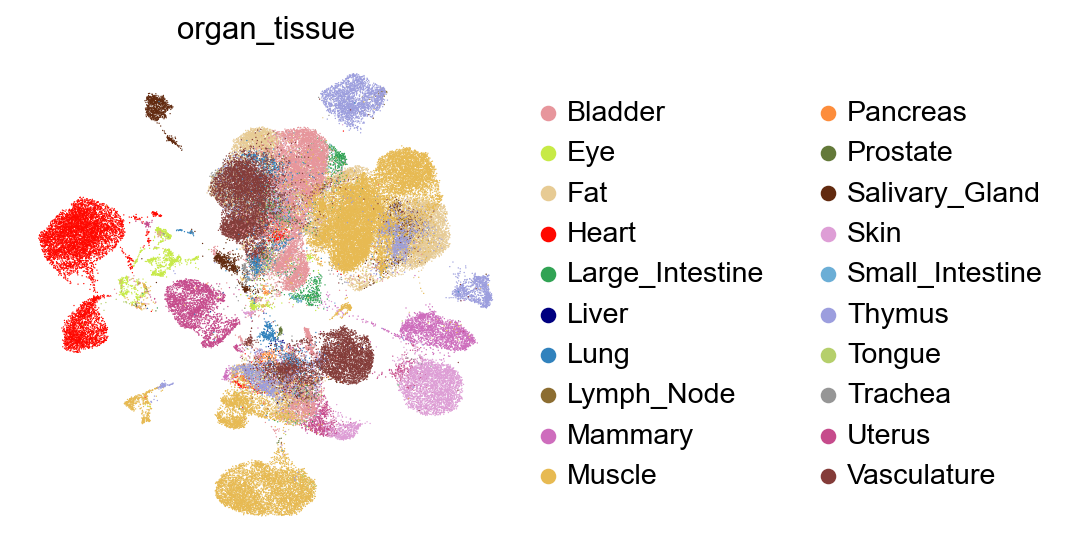

In [3]:
c = adata[adata.obs["compartment"]=='stromal']
sc.pp.neighbors(c, use_rep="X_scvi")
sc.tl.umap(c)
sc.pl.umap(c, color='organ_tissue')